<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>: Idan Levi<br>
<b>NetID</b>: il177<br>
<b>Recitation</b>: Sec 01 / Tue 8:25pm<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: il     


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Spring 2020

# Assignment 2: Data Cleaning and Visualization (100 pts)

### Due Date:  Monday March 23rd, 2020 by 11:55 PM###

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the course staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found https://opendata.cityofnewyork.us/

## Setup

In [1]:
import pandas as pd
import zipfile
import seaborn as sns


# Part 1:Getting Data

We will work with the NYPD Historic complaint data set. The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [2]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

Using version already downloaded: Wed Mar 18 01:33:27 2020
MD5 hash of file: dec46291e776229a4f8677ab77a5421f
Located at data/NYPD_Complaint_Data_Historic.csv


### 1.2 Inspect the size of the file (2 pts)
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [3]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
import os
### BEGIN SOLUTION

print(os.path.getsize(dest_path))
    
#### END SOLUTION

212842146


### 1.3 Split the large file (2 pts)
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [4]:
# Using utils library, find the number of lines in the file
from utils import line_count
line_num = line_count(dest_path)
print(line_num)


684794


In [5]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.
num_file = line_num / 10
print(num_file)
### BEGIN SOLUTION
def split_data_file(file_dest, num_f):
    counter = 0
    i = 1
    df = pd.read_csv('data/NYPD_Complaint_Data_Historic.csv', iterator = True, chunksize = int(num_f))
    save_to_path = data_dir
    for chunk in df:
        new_file = 'NYPD_Complaint_Data_Historic_{}.csv'.format(i)
        chunk.to_csv(os.path.join(save_to_path,new_file), mode='w', header = True, index = True)
        i += 1
        counter += 1
        if i > 10:
            break
    return_msg = f'succesfully created {counter} files'
    return return_msg

split_data_file(data_dir, num_file)

### END SOLUTION

68479.4


'succesfully created 10 files'

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [6]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic_10.csv',
 '.DS_Store',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_9.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [7]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '876525802,04/10/2008,19:10:00,,,73,04/10/2008,341,PETIT LARCENY,321,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,BROOKLYN,,STREET,N.Y. POLICE DEPT,0,NA,,NA,1008495,183171,,,,,40.669413836,-73.91260308,"(40.669413836, -73.91260308)",PATROL BORO BKLYN NORTH,,18-24,BLACK,M\n',
 '402693528,06/03/2007,15:23:00,,,28,06/03/2007,236,DANGEROUS WEAPONS,782,"WEAPONS, POSSESSION, ETC",COMPLETED,MISDEMEANOR,MANHATTAN,,STREET,N.Y. POLICE DEPT,0,NA,,NA,999336,231461,,,,,40.801978284,-73.945511151,"(40.801978284, -73.945511151)",PATROL BORO MAN NORTH,,,UNKNOWN,E\n',
 '832030069,02/16/2010,20:50:00,02/

### 1.6 Inspecting and describing data columns (2 pts)
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so. 
##### BEGIN SOLUTION (please edit this cell)
* CMPLNT_NUM : 
* CMPLNT_FR_DT: 
* CMPLNT_FR_TM:
* CMPLNT_TO_DT:
* CMPLNT_TO:
* ADDR_PCT_CD:
* RPT_DT:
* KY_CD:
* OFNS_DESC:
* PD_CD:
* PD_DESC:
* CRM_ATPT_CPTD_CD:
* LAW_CAT_CD:
* BORO_NM:
* LOC_OF_OCCUR_DESC:
* PREM_TYP_DESC:
* JURIS_DESC:
* JURISDICTION_CODE:
* PARKS_NM:
* HADEVELOPT:
* HOUSING_PSA:
* X_COORD_CD:
* Y_COORD_CD:
* SUSP_AGE_GROUP:
* SUSP_RACE:
* SUSP_SEX:
* TRANSIT_DISTRICT:
* Latitude:
* Longitude:
* Lat_Lon:
* PATROL_BORO:
* STATION_NAME:
* VIC_AGE_GROUP:
* VIC_RACE:
* VIC_SEX:
##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Loading Data into a DataFrame (2 pts)
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [8]:
import pandas as pd
import time
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic_1.csv")
### BEGIN SOLUTION
start = time.time()
df = pd.DataFrame(calls)
print('Time to load the data into a DataFrame: {} Sec'.format(time.time() - start))
df
### END SOLUTION

Time to load the data into a DataFrame: 0.00012183189392089844 Sec


,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,0,876525802,04/10/2008,19:10:00,NaN,NaN,73.0,04/10/2008,341,PETIT LARCENY,...,NaN,NaN,40.669414,-73.912603,"(40.669413836, -73.91260308)",PATROL BORO BKLYN NORTH,NaN,18-24,BLACK,M
1,1,402693528,06/03/2007,15:23:00,NaN,NaN,28.0,06/03/2007,236,DANGEROUS WEAPONS,...,NaN,NaN,40.801978,-73.945511,"(40.801978284, -73.945511151)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E
2,2,832030069,02/16/2010,20:50:00,02/16/2010,20:50:00,102.0,02/16/2010,105,ROBBERY,...,NaN,NaN,40.699990,-73.830978,"(40.699990268, -73.830977746)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,D
3,3,538308771,11/10/2009,16:35:00,11/10/2009,16:45:00,79.0,11/10/2009,341,PETIT LARCENY,...,NaN,NaN,40.681005,-73.955035,"(40.681004729, -73.955034577)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
4,4,965693192,04/11/2006,09:30:00,04/11/2006,10:00:00,123.0,04/25/2006,112,THEFT-FRAUD,...,NaN,NaN,NaN,NaN,NaN,PATROL BORO STATEN ISLAND,NaN,25-44,WHITE,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68474,68474,320610745,06/13/2006,08:40:00,NaN,NaN,105.0,06/13/2006,578,HARRASSMENT 2,...,F,NaN,40.730975,-73.733407,"(40.730975283, -73.733407199)",PATROL BORO QUEENS SOUTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,F
68475,68475,832654610,10/28/2011,23:45:00,10/28/2011,23:49:00,79.0,10/29/2011,347,INTOXICATED & IMPAIRED DRIVING,...,NaN,NaN,40.699413,-73.953370,"(40.699413244, -73.95337042)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,E
68476,68476,957763028,02/05/2009,08:15:00,02/12/2009,09:54:00,109.0,03/03/2009,351,CRIMINAL MISCHIEF & RELATED OF,...,NaN,NaN,40.793980,-73.797491,"(40.793979811, -73.797491172)",PATROL BORO QUEENS NORTH,NaN,NaN,UNKNOWN,D
68477,68477,143730051,11/19/2006,23:59:00,NaN,NaN,101.0,11/21/2006,361,OFF. AGNST PUB ORD SENSBLTY &,...,M,NaN,40.595266,-73.755010,"(40.595265987, -73.755010164)",PATROL BORO QUEENS SOUTH,NaN,45-64,BLACK,F


### 2.2 Description of Fields (2 pts)
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [9]:
calls.info()
calls.describe()
### BEGIN SOLUTION

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed
# columns that can be removed: if Non-Null (col) < (total_num_of_rows / 2):
# PARKS_NM, HADEVELOPT, HOUSING_PSA, SUSP_AGE_GROUP, SUSP_RACE, SUSP_SEX, TRANSIT_DISTRICT, STATION_NAME, 
### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68479 entries, 0 to 68478
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         68479 non-null  int64  
 1   CMPLNT_NUM         68479 non-null  int64  
 2   CMPLNT_FR_DT       68457 non-null  object 
 3   CMPLNT_FR_TM       68477 non-null  object 
 4   CMPLNT_TO_DT       43215 non-null  object 
 5   CMPLNT_TO_TM       43300 non-null  object 
 6   ADDR_PCT_CD        68006 non-null  float64
 7   RPT_DT             68479 non-null  object 
 8   KY_CD              68479 non-null  int64  
 9   OFNS_DESC          68032 non-null  object 
 10  PD_CD              67910 non-null  float64
 11  PD_DESC            67910 non-null  object 
 12  CRM_ATPT_CPTD_CD   68479 non-null  object 
 13  LAW_CAT_CD         68479 non-null  object 
 14  BORO_NM            67794 non-null  object 
 15  LOC_OF_OCCUR_DESC  50822 non-null  object 
 16  PREM_TYP_DESC      672

,Unnamed: 0,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,PARKS_NM,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,68479.000000,6.847900e+04,68006.000000,68479.000000,67910.000000,67910.000000,0.0,4565.000000,6.495300e+04,6.495300e+04,1305.000000,64953.000000,64953.000000
mean,34239.000000,5.502041e+08,62.471003,286.269177,426.167545,0.870063,NaN,5554.191019,1.004952e+06,2.083025e+05,13.515709,40.738371,-73.925264
std,19768.328879,2.601545e+08,33.879560,148.873280,217.523708,7.870111,NaN,12086.794423,2.276250e+04,3.665048e+04,12.542502,0.100288,0.082098
min,0.000000,1.000014e+08,1.000000,101.000000,101.000000,0.000000,NaN,6.000000,1.798420e+05,1.211310e+05,1.000000,40.498905,-76.898277
25%,17119.500000,3.247086e+08,40.000000,113.000000,258.000000,0.000000,NaN,483.000000,9.925580e+05,1.848220e+05,3.000000,40.673910,-73.970050
50%,34239.000000,5.511078e+08,61.000000,341.000000,397.000000,0.000000,NaN,726.000000,1.005005e+06,2.074130e+05,4.000000,40.735956,-73.925068
75%,51358.500000,7.754714e+08,90.000000,351.000000,637.000000,0.000000,NaN,1233.000000,1.016596e+06,2.372020e+05,30.000000,40.817712,-73.883200
max,68478.000000,9.999840e+08,123.000000,685.000000,922.000000,97.000000,NaN,62675.000000,1.067185e+06,5.205015e+06,34.000000,54.304232,-73.700720


### 2.2 Finding Uniques (4 pts)

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [10]:
calls.nunique()
### BEGIN SOLUTION

# Questions
# 1. How many distinct locations where the complaints have come from?  31312
# 2. How many age groups are represented in the data set? Victim -> 9, Suspended-> 11
# 3. How many boroughs are included in the data set? Patrol boro -> 8, boro_nm -> 5, 
# 4. How many offense types are listed in this data set? ofns_desc -> Lat_loc -> 31314

### END SOLUTION

Unnamed: 0           68479
CMPLNT_NUM           68479
CMPLNT_FR_DT          2458
CMPLNT_FR_TM          1414
CMPLNT_TO_DT          2218
CMPLNT_TO_TM          1423
ADDR_PCT_CD             76
RPT_DT                2115
KY_CD                   62
OFNS_DESC               54
PD_CD                  291
PD_DESC                283
CRM_ATPT_CPTD_CD         2
LAW_CAT_CD               3
BORO_NM                  5
LOC_OF_OCCUR_DESC        5
PREM_TYP_DESC           69
JURIS_DESC              18
JURISDICTION_CODE       18
PARKS_NM                 0
HADEVELOPT             233
HOUSING_PSA            644
X_COORD_CD           25550
Y_COORD_CD           27269
SUSP_AGE_GROUP           9
SUSP_RACE                7
SUSP_SEX                 3
TRANSIT_DISTRICT        12
Latitude             31312
Longitude            31314
Lat_Lon              31314
PATROL_BORO              8
STATION_NAME           283
VIC_AGE_GROUP           11
VIC_RACE                 8
VIC_SEX                  4
dtype: int64

### 2.3 Offense by Boro (2 pts)
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [11]:
### BEGIN SOLUTION
calls_by_Boro_and_offense = calls.groupby(['OFNS_DESC', 'BORO_NM'])['BORO_NM'].count()
calls_by_Boro_and_offense
### END SOLUTION

OFNS_DESC                 BORO_NM      
ADMINISTRATIVE CODE       BRONX             21
                          BROOKLYN          43
                          MANHATTAN         29
                          QUEENS            37
                          STATEN ISLAND     11
                                          ... 
VEHICLE AND TRAFFIC LAWS  BRONX            206
                          BROOKLYN         192
                          MANHATTAN        158
                          QUEENS           185
                          STATEN ISLAND     11
Name: BORO_NM, Length: 214, dtype: int64

### 2.4 Offenses in Bronx (2 pts)

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [12]:
### BEGIN SOLUTION
calls_ofns_names = calls.loc[(calls['BORO_NM'] == 'BRONX'), 'OFNS_DESC']
calls_ofns_names
### END SOLUTION

# How many offenses were committed in Bronx during the analysis period? 16,424

6         POSSESSION OF STOLEN PROPERTY
10                       FELONY ASSAULT
17                        PETIT LARCENY
19                    DANGEROUS WEAPONS
20                      DANGEROUS DRUGS
                      ...              
68460      ASSAULT 3 & RELATED OFFENSES
68461    CRIMINAL MISCHIEF & RELATED OF
68463      ASSAULT 3 & RELATED OFFENSES
68466                   DANGEROUS DRUGS
68467    CRIMINAL MISCHIEF & RELATED OF
Name: OFNS_DESC, Length: 16424, dtype: object

### 2.5 Most Common Crimes in NYC (2 pts)

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [13]:
### BEGIN SOLUTION

def list_of_most_common_ofns_in_bronx(data_frame):
    calls_most_common = calls.groupby('OFNS_DESC')['BORO_NM'].value_counts()
    calls_most_common = calls_most_common.filter(like='BRONX', axis=0)
    result_most_common_df = calls_most_common.sort_values(ascending=False)[:5]
    ofns_result = []
    for index, value in result_most_common_df.items():
        ofns_result.append(index[0])
    return ofns_result

list_of_most_common_ofns_in_bronx(calls)

### END SOLUTION

['DANGEROUS DRUGS',
 'PETIT LARCENY',
 'HARRASSMENT 2',
 'ASSAULT 3 & RELATED OFFENSES',
 'CRIMINAL MISCHIEF & RELATED OF']

### 2.6 Probability of a Crime in Bronx (2 pts)
What is the probability that a the crime "Arson" can happen in Bronx?

In [14]:
### BEGIN SOLUTION
# the times Arson occures divided by the total number of all crimes.
# get how many time Arson occurs
arson_crime = len(calls.loc[(calls['OFNS_DESC'] == 'ARSON') & (calls['BORO_NM'] == 'BRONX')])
total_crimes_in_bronx = len(calls.loc[calls['BORO_NM'] == 'BRONX'])
prob_of_arson = (arson_crime / total_crimes_in_bronx)
print('The probability of an "Arson" crime to occur is {:.5f} '.format(prob_of_arson))
### END SOLUTION

The probability of an "Arson" crime to occur is 0.00840 


# Part 3: Visualizing the Data
Plotting is a key activity in Data Science. Matplotlib is a widely used plotting library in python.
Here is the documentation: https://matplotlib.org/api/pyplot_api.html.
We're going to start by going through the official `pyplot` tutorial. Please go through it and familiarize yourself with the basics of `pyplot`. This should take roughly 25 minutes.


## Set Up
Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

Here is a basic example about how you can plot with pyplot. Please make sure you know how to set axis bounds with `plt.axis`, set xticks and labels with `plt.xticks` and use other functions such as `plt.xlabel`, `plt.ylabel`, `plt.title`

Text(0.5, 1.0, 'Simple sample for pyplot')

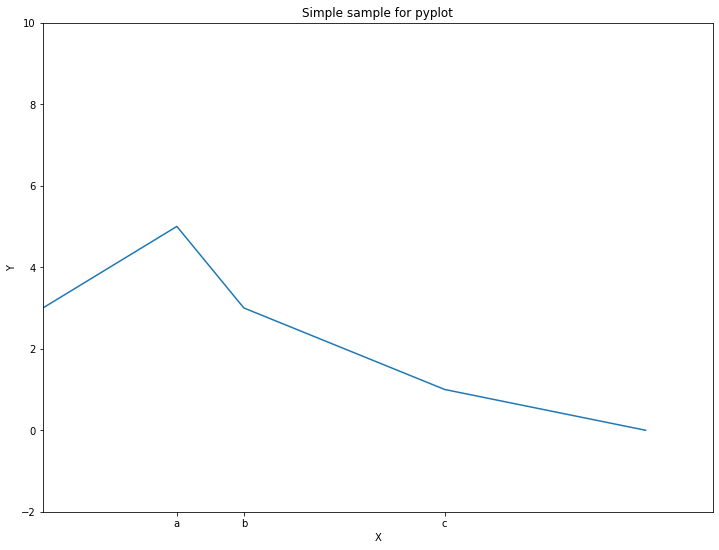

In [16]:
plt.plot([-1,2,3,6,9],[2,5,3,1,0])
plt.axis([0,10,-2,10])
plt.xticks((2,3,6),('a','b','c'))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple sample for pyplot")

Now you are familiar with the basic pyplot. Please pay attention on how you can set the plot figure size by using `figure` and add labels by using `xlabel`, `ylabel`. It will be helpful for you to do the following plots.

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

### 3.1 Plotting a Series (2 pts)
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

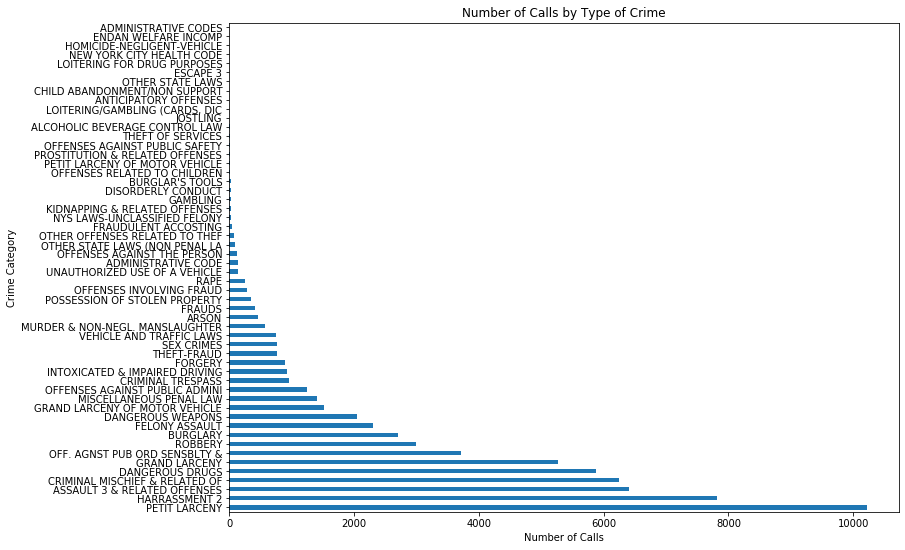

In [362]:
### BEGIN SOLUTION
dd = calls['OFNS_DESC'].value_counts()
plt.xlabel('Number of Calls')
plt.ylabel('Crime Category')
plt.title('Number of Calls by Type of Crime')
dd.plot.barh(x='OFNS_DESC', y=dd)

### END SOLUTION

### 3.2 Getting a Better Plot (9 pts)
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

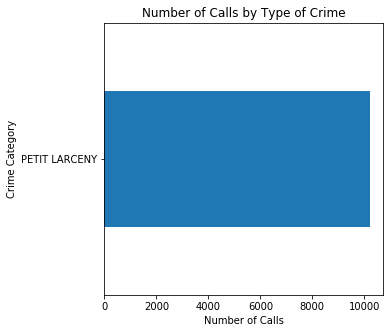

In [363]:
plt.figure(figsize=(5,5))
### BEGIN SOLUTION
dd = calls['OFNS_DESC'].value_counts()
s = pd.Series(dd).where(s[:] > 10000).dropna()
plt.xlabel('Number of Calls')
plt.ylabel('Crime Category')
plt.title('Number of Calls by Type of Crime')
s.plot.barh()

### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type")

[Text(0, 0.5, 'Crime Category'),
 Text(0.5, 0, 'Number of Calls'),
 Text(0.5, 1.0, 'Number of Calls By Crime Type')]

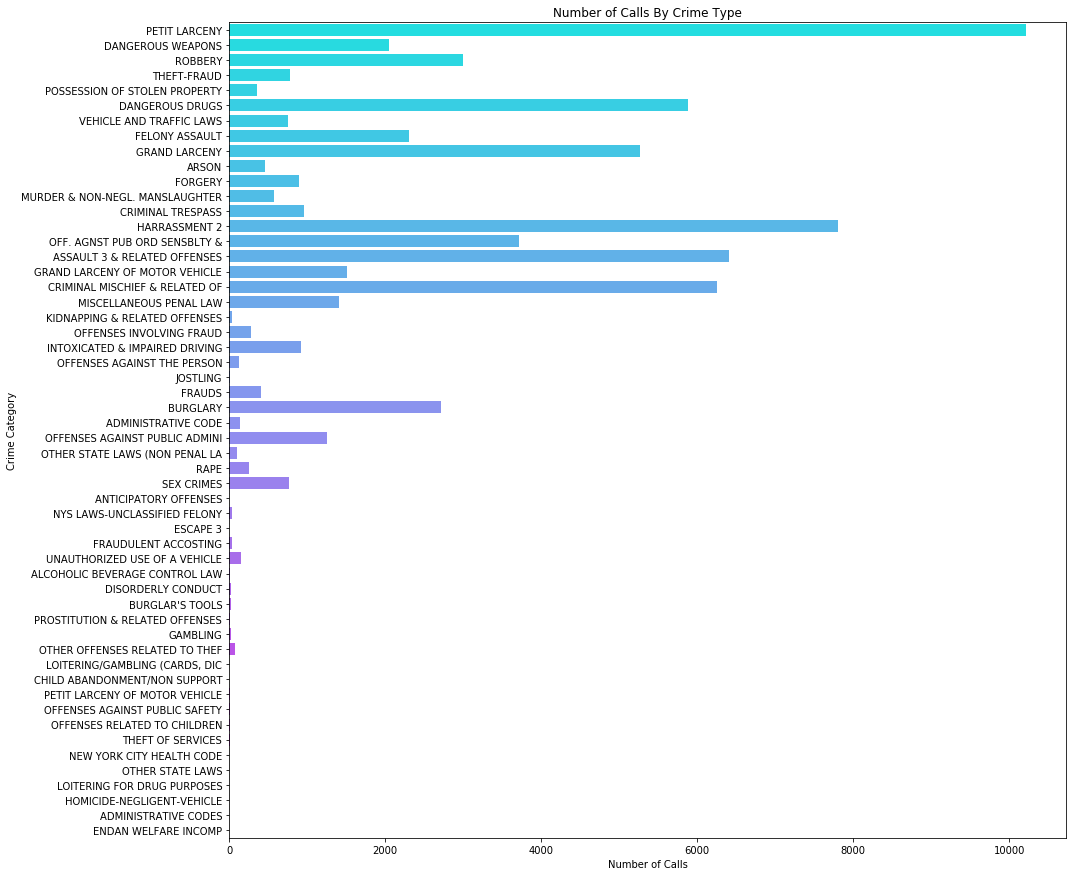

In [426]:
plt.figure(figsize=(15,15))
### BEGIN SOLUTION
seaborn_plot = sns.countplot(y='OFNS_DESC', data=calls, orient='h', palette = "cool")
seaborn_plot.set(xlabel="Number of Calls", ylabel="Crime Category", title="Number of Calls By Crime Type")

### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

[Text(0, 0.5, 'Crime Category'),
 Text(0.5, 0, 'Number of Calls'),
 Text(0.5, 1.0, 'Number of Calls By Crime Type')]

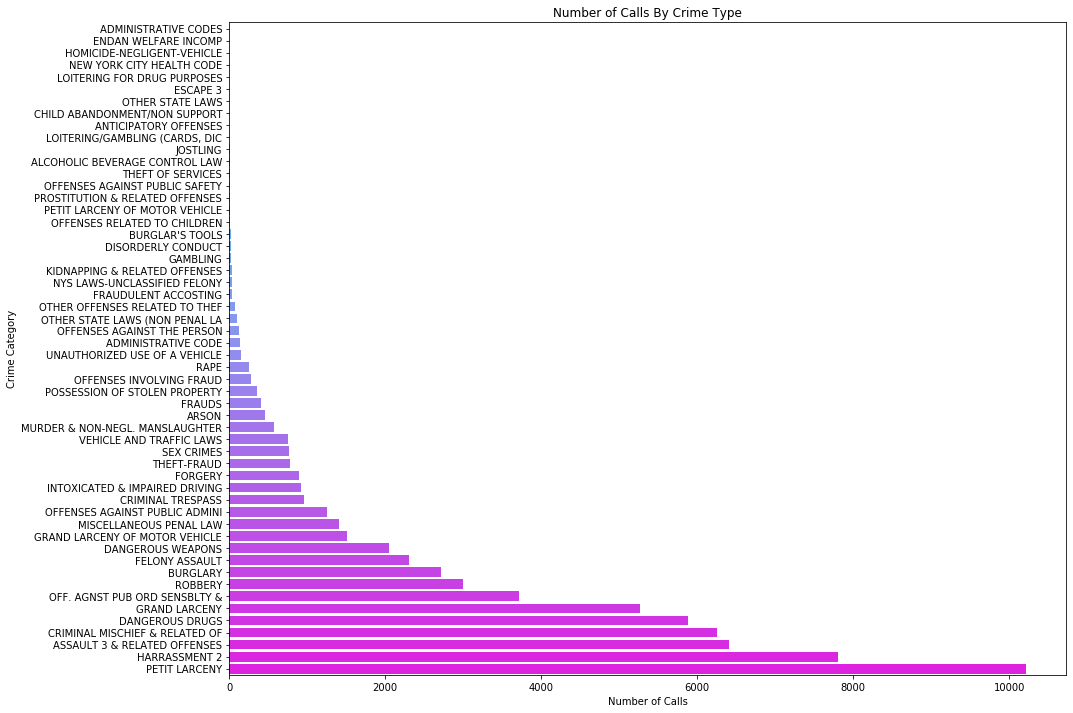

In [432]:
plt.figure(figsize=(15,12))
### BEGIN SOLUTION
seaborn_plot = sns.countplot(y='OFNS_DESC', data=calls, orient='h',order=calls['OFNS_DESC'].value_counts(ascending=True).index,palette = "cool")
seaborn_plot.set(xlabel="Number of Calls", ylabel="Crime Category", title="Number of Calls By Crime Type")




### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.




### 3.3 Making more plots (5 pts)

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

**Hint:** *Another possible way to solve it is to look at the build-in datetime function in pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)*

In [451]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
### BEGIN SOLUTION
temp_df = calls
temp_df['CMPLNT_FR_DT'] = pd.to_datetime(temp_df['CMPLNT_FR_DT'])
calls['DAY_OF_WEEK'] = temp_df['CMPLNT_FR_DT'].dt.day_name()
calls
### END SOLUTION

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,DAY_OF_WEEK
0,0,876525802,2008-04-10,19:10:00,NaN,NaN,73.0,04/10/2008,341,PETIT LARCENY,...,NaN,40.669414,-73.912603,"(40.669413836, -73.91260308)",PATROL BORO BKLYN NORTH,NaN,18-24,BLACK,M,Thursday
1,1,402693528,2007-06-03,15:23:00,NaN,NaN,28.0,06/03/2007,236,DANGEROUS WEAPONS,...,NaN,40.801978,-73.945511,"(40.801978284, -73.945511151)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,E,Sunday
2,2,832030069,2010-02-16,20:50:00,02/16/2010,20:50:00,102.0,02/16/2010,105,ROBBERY,...,NaN,40.699990,-73.830978,"(40.699990268, -73.830977746)",PATROL BORO QUEENS SOUTH,NaN,NaN,UNKNOWN,D,Tuesday
3,3,538308771,2009-11-10,16:35:00,11/10/2009,16:45:00,79.0,11/10/2009,341,PETIT LARCENY,...,NaN,40.681005,-73.955035,"(40.681004729, -73.955034577)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D,Tuesday
4,4,965693192,2006-04-11,09:30:00,04/11/2006,10:00:00,123.0,04/25/2006,112,THEFT-FRAUD,...,NaN,NaN,NaN,NaN,PATROL BORO STATEN ISLAND,NaN,25-44,WHITE,M,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68474,68474,320610745,2006-06-13,08:40:00,NaN,NaN,105.0,06/13/2006,578,HARRASSMENT 2,...,NaN,40.730975,-73.733407,"(40.730975283, -73.733407199)",PATROL BORO QUEENS SOUTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,F,Tuesday
68475,68475,832654610,2011-10-28,23:45:00,10/28/2011,23:49:00,79.0,10/29/2011,347,INTOXICATED & IMPAIRED DRIVING,...,NaN,40.699413,-73.953370,"(40.699413244, -73.95337042)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,E,Friday
68476,68476,957763028,2009-02-05,08:15:00,02/12/2009,09:54:00,109.0,03/03/2009,351,CRIMINAL MISCHIEF & RELATED OF,...,NaN,40.793980,-73.797491,"(40.793979811, -73.797491172)",PATROL BORO QUEENS NORTH,NaN,NaN,UNKNOWN,D,Thursday
68477,68477,143730051,2006-11-19,23:59:00,NaN,NaN,101.0,11/21/2006,361,OFF. AGNST PUB ORD SENSBLTY &,...,NaN,40.595266,-73.755010,"(40.595265987, -73.755010164)",PATROL BORO QUEENS SOUTH,NaN,45-64,BLACK,F,Sunday


### 3.4 Seaborn plots (10 pts)

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

[Text(0, 0, 'Sunday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday')]

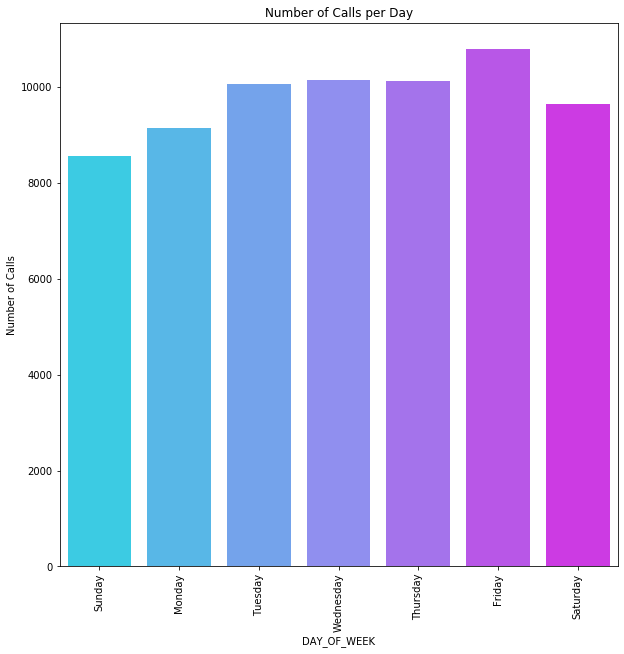

In [465]:
plt.figure(figsize=(10,10))
### BEGIN SOLUTION
crime_per_day = sns.countplot(x='DAY_OF_WEEK', data=calls, order=days, palette = 'cool')
crime_per_day.set(xlabel="DAY_OF_WEEK", ylabel="Number of Calls", title="Number of Calls per Day")
crime_per_day.set_xticklabels(days, rotation=90)

### END SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

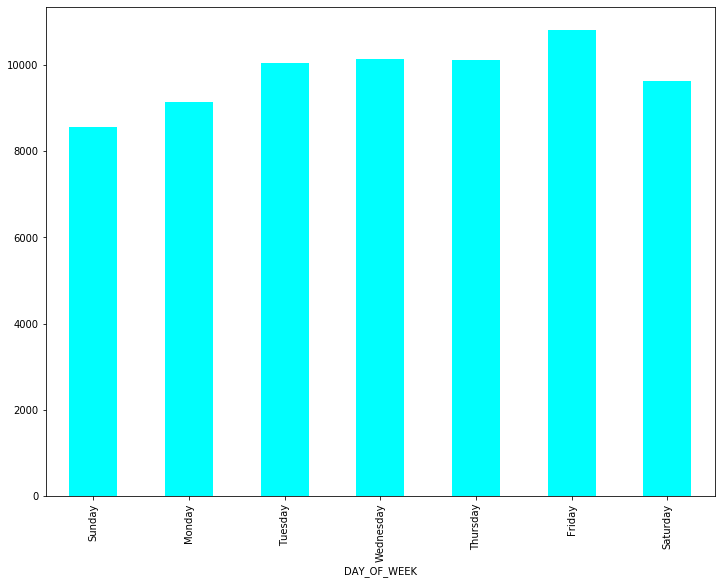

In [593]:
### BEGIN SOLUTION
f = calls.groupby(['DAY_OF_WEEK'])['DAY_OF_WEEK'].agg('count').reindex(days)
f.plot.bar(colormap='cool')

### END SOLUTION

### 3.5 What Day of the Week is more calls? (6 pts)

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION (please edit this cell)

As illustrates above weekdays tend to have more call in particular to Friday. When it comes to weekend Saturday is second and Sunday is third while Friday is the winner with all calls over the week.

##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

In [ ]:
### BEGIN SOLUTION

### END SOLUTION

### 3.6 (2 pts)

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION (please edit this cell)

##### END SOLUTION

### 3.7 More Plots (5 pts)

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

In [ ]:
### BEGIN SOLUTION


### END SOLUTION



### 3.8 Time of events (10 pts)

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

In [ ]:
### BEGIN SOLUTION

### END SOLUTION

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

In [ ]:
### BEGIN SOLUTION

### END SOLUTION

### 3.9 More plots (5 pts)

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

In [ ]:
### BEGIN SOLUTION

### END SOLUTION

### 3.10 Spike in burglary? (7 pts)

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION (please edit this cell)


#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

In [ ]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90, figsize=(15,10));

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

In [ ]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION
ax = * Your code here *
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");
answer = "Your Answer here"

### END SOLUTION

# Part 4 - Altair Plot

Altair (https://altair-viz.github.io/) is a declarative statistical visualization library for Python, based on Vega and Vega-Lite. By design, Altair does not produce plots consisting of pixels, but plots consisting of data plus a visualization specification. The data can be a pandas DataFrame, a file or URL, or a JSON data object. When you specify the data as a pandas DataFrame, this data is converted to JSON and included in its entirety in the plot spec.


Since you've already learned the basic about Altair in the recitation, we will just go straight to the practice part. 

We are going to repeat some questions above and solve them using Altair.

In [ ]:
!pip install altair

In [ ]:
import altair as alt

### 4.1 Day of week (6 pts)
Create a vertical bar plot of the number of total noise violations "BURGLARY" on each day of the week, ordered by the days of the week starting with Sunday. And points out the day which have the most violation by highlighting that bar.

In [ ]:
### BEGIN SOLUTION

### END SOLUTION


### 4.2 Aggregation Transforms (6 pts)
Generate a `barh` plot and display the value counts for `OFNS_DESC` in Bronx on Friday in descending order. Visualize it as a barh chart with the counts in descending order and place the counts on the right side of each bar. ***Instead of value_counts(), now you can only use aggregation transforms within Altair.***

https://altair-viz.github.io/user_guide/transform/aggregate.html

In [ ]:
alt.data_transformers.disable_max_rows()
### BEGIN SOLUTION

### END SOLUTION

# Part 5 - Visualization of crimes on a Map of NYC (5 pts)
In this final part, we attempt to visualize the crimes committed in NYC on a Map. First we need to installing some mapping software. run the cell below to install folium package for mapping software. Here is a brief introduction to folium (https://python-visualization.github.io/folium/quickstart.html).

Your following map plot should be something like this:
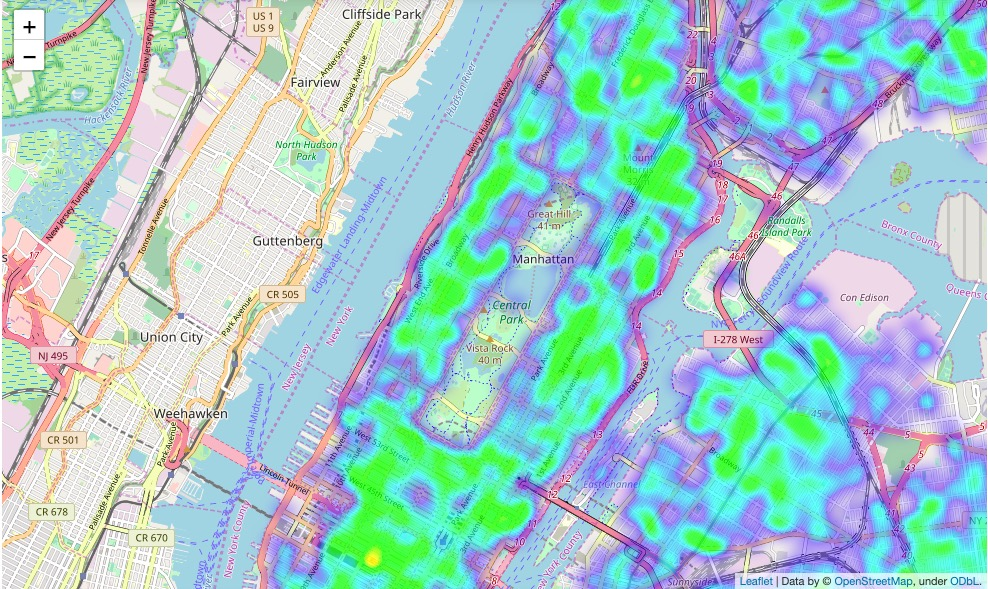

It is an open question, and the purpose of this part is to push you to read the documents and learn how to use it on your own. It is an important skill not only for this course but is also useful in the future.

In [ ]:
!pip install --upgrade folium

In [ ]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime


import folium
import folium.plugins # The Folium Javascript Map Library

NY_COORDINATES = (40.785091, -73.968285)
### BEGIN SOLUTION
sf_map = folium.Map(* Your code here *)
locs = * Your code here * #get the latitude and longitude for BURGLARY in NYC, make sure to drop all null values
heatmap = folium.plugins.HeatMap(* Your code here *)

### END SOLUTION
sf_map.add_child(heatmap)

## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as section#_netID_Assign2.jpynb<br>
<b> Submit To: </b> Sakai &rarr; Assignments &rarr; Assignment2 <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

Credits: Josh Hug, and Berkeley Data Science Group for their contributions to the original version.